#  Credit Card Fraud Detection ML Algorithm

We have given the details of credit card transactions and we need to design a machine learning model to clasify weather the transaction made is genuiune or a fraud.

## Data

The Data is taken from kagle: https://www.kaggle.com/mlg-ulb/creditcardfraud

### About the Data:
    * Data contains 31 Columns.
    * Data doesn't have any missing value.
    * Data is in Numeric Form.
    * Data is highly Imbalanced.


## Evaluation  Method

Since the Data is highly imbalanced so we are advised to use `Area Under the Precision-Recall Curve (AUPRC)` for evaluation of our model.

# Importing the Tools 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the data

In [2]:
# Importing the Data
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**We have 2,84,807 entries**

## Correlation Matrix

In [4]:
# Lets make a function to make a Correlation Matric
def correlation(df):
    fig,ax=plt.subplots(figsize=(40,30))
    corr=df.corr()
    sns.heatmap(corr,
                  cmap='coolwarm',
                  annot=True,
                  fmt='.2f',
                  annot_kws={'size':16},
               vmin=-1, vmax=1, center=0)
    plt.title("Correlation Matrix",
             fontsize=50)
    plt.xticks(rotation=90,fontsize=30)
    plt.yticks(rotation=15, fontsize=30)
    plt.show()
    return corr

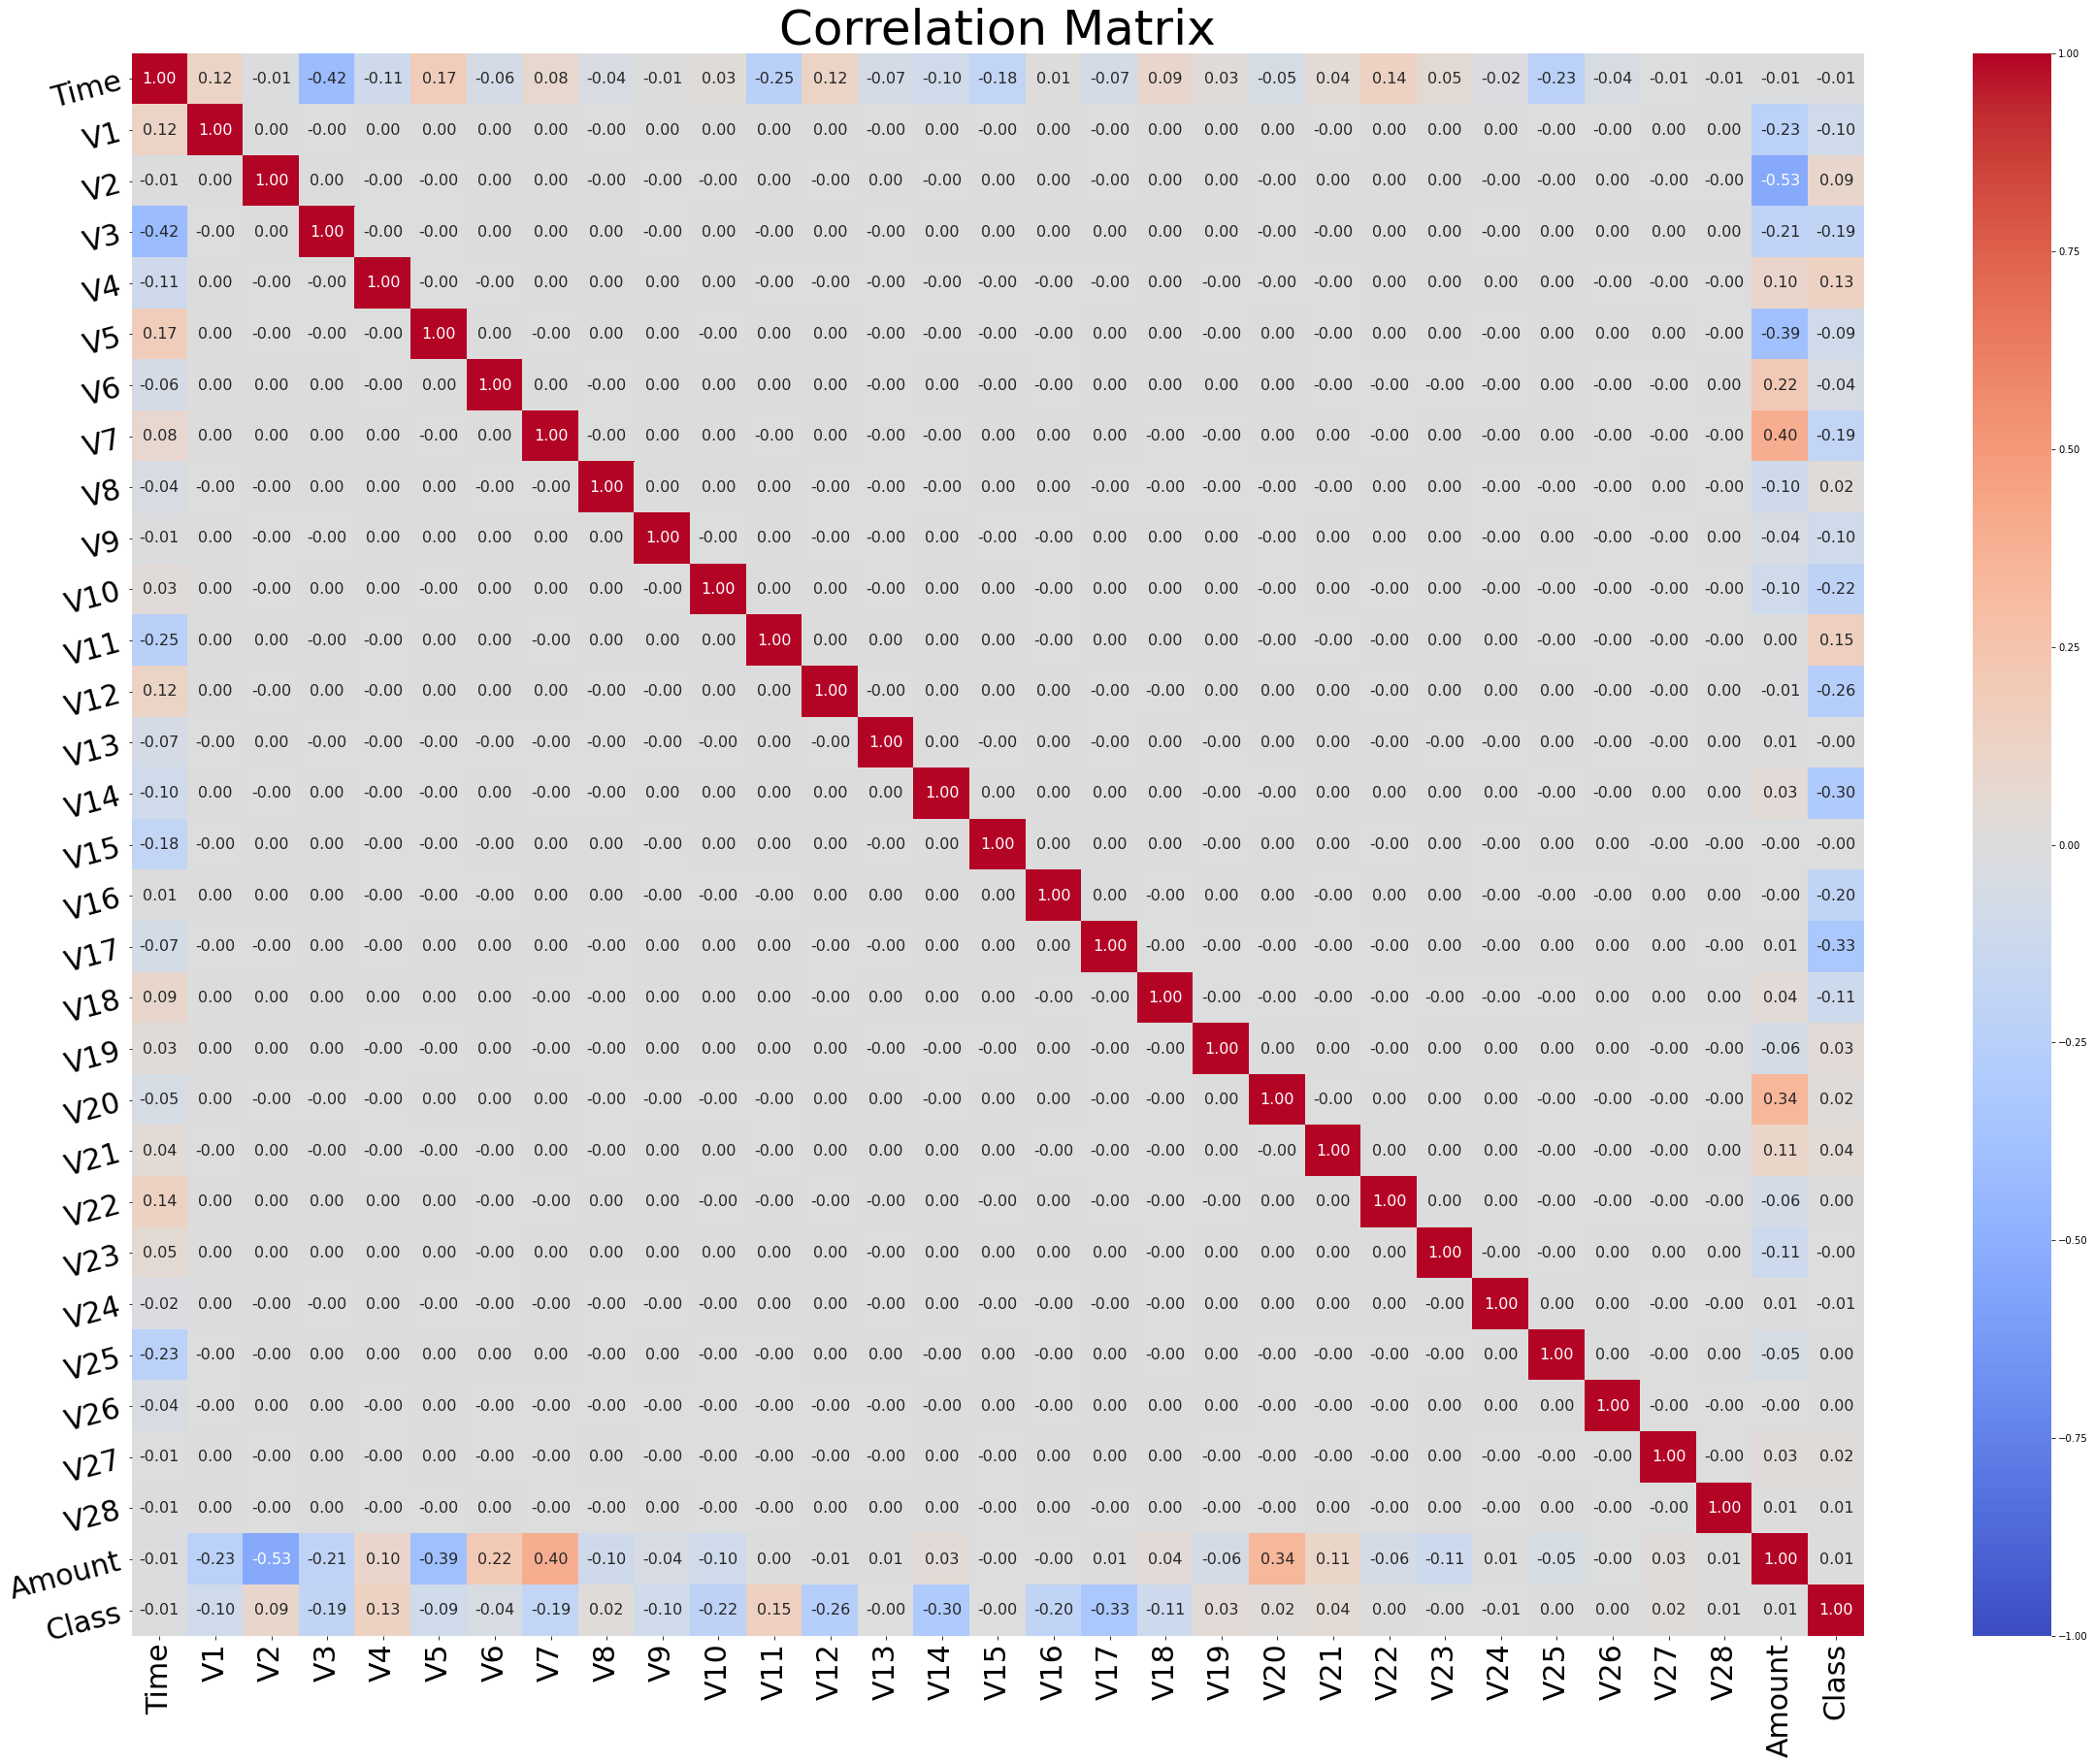

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


In [5]:
correlation(df)

There are few columns in our data that are not contributing to our class variable.
Let's remove those columns.

In [6]:
list_cols=[]
def non_contributing(df):
    """
    Function to tell which columns are not contributing to our class variable.
        """
    corr_mat=correlation(df)
    for i in range(len(df.columns)):
        if(abs(corr_mat.Class.iloc[i])<=0.005):
            list_cols.append(corr_mat.columns[i])
        else:
            pass
    return list_cols
        

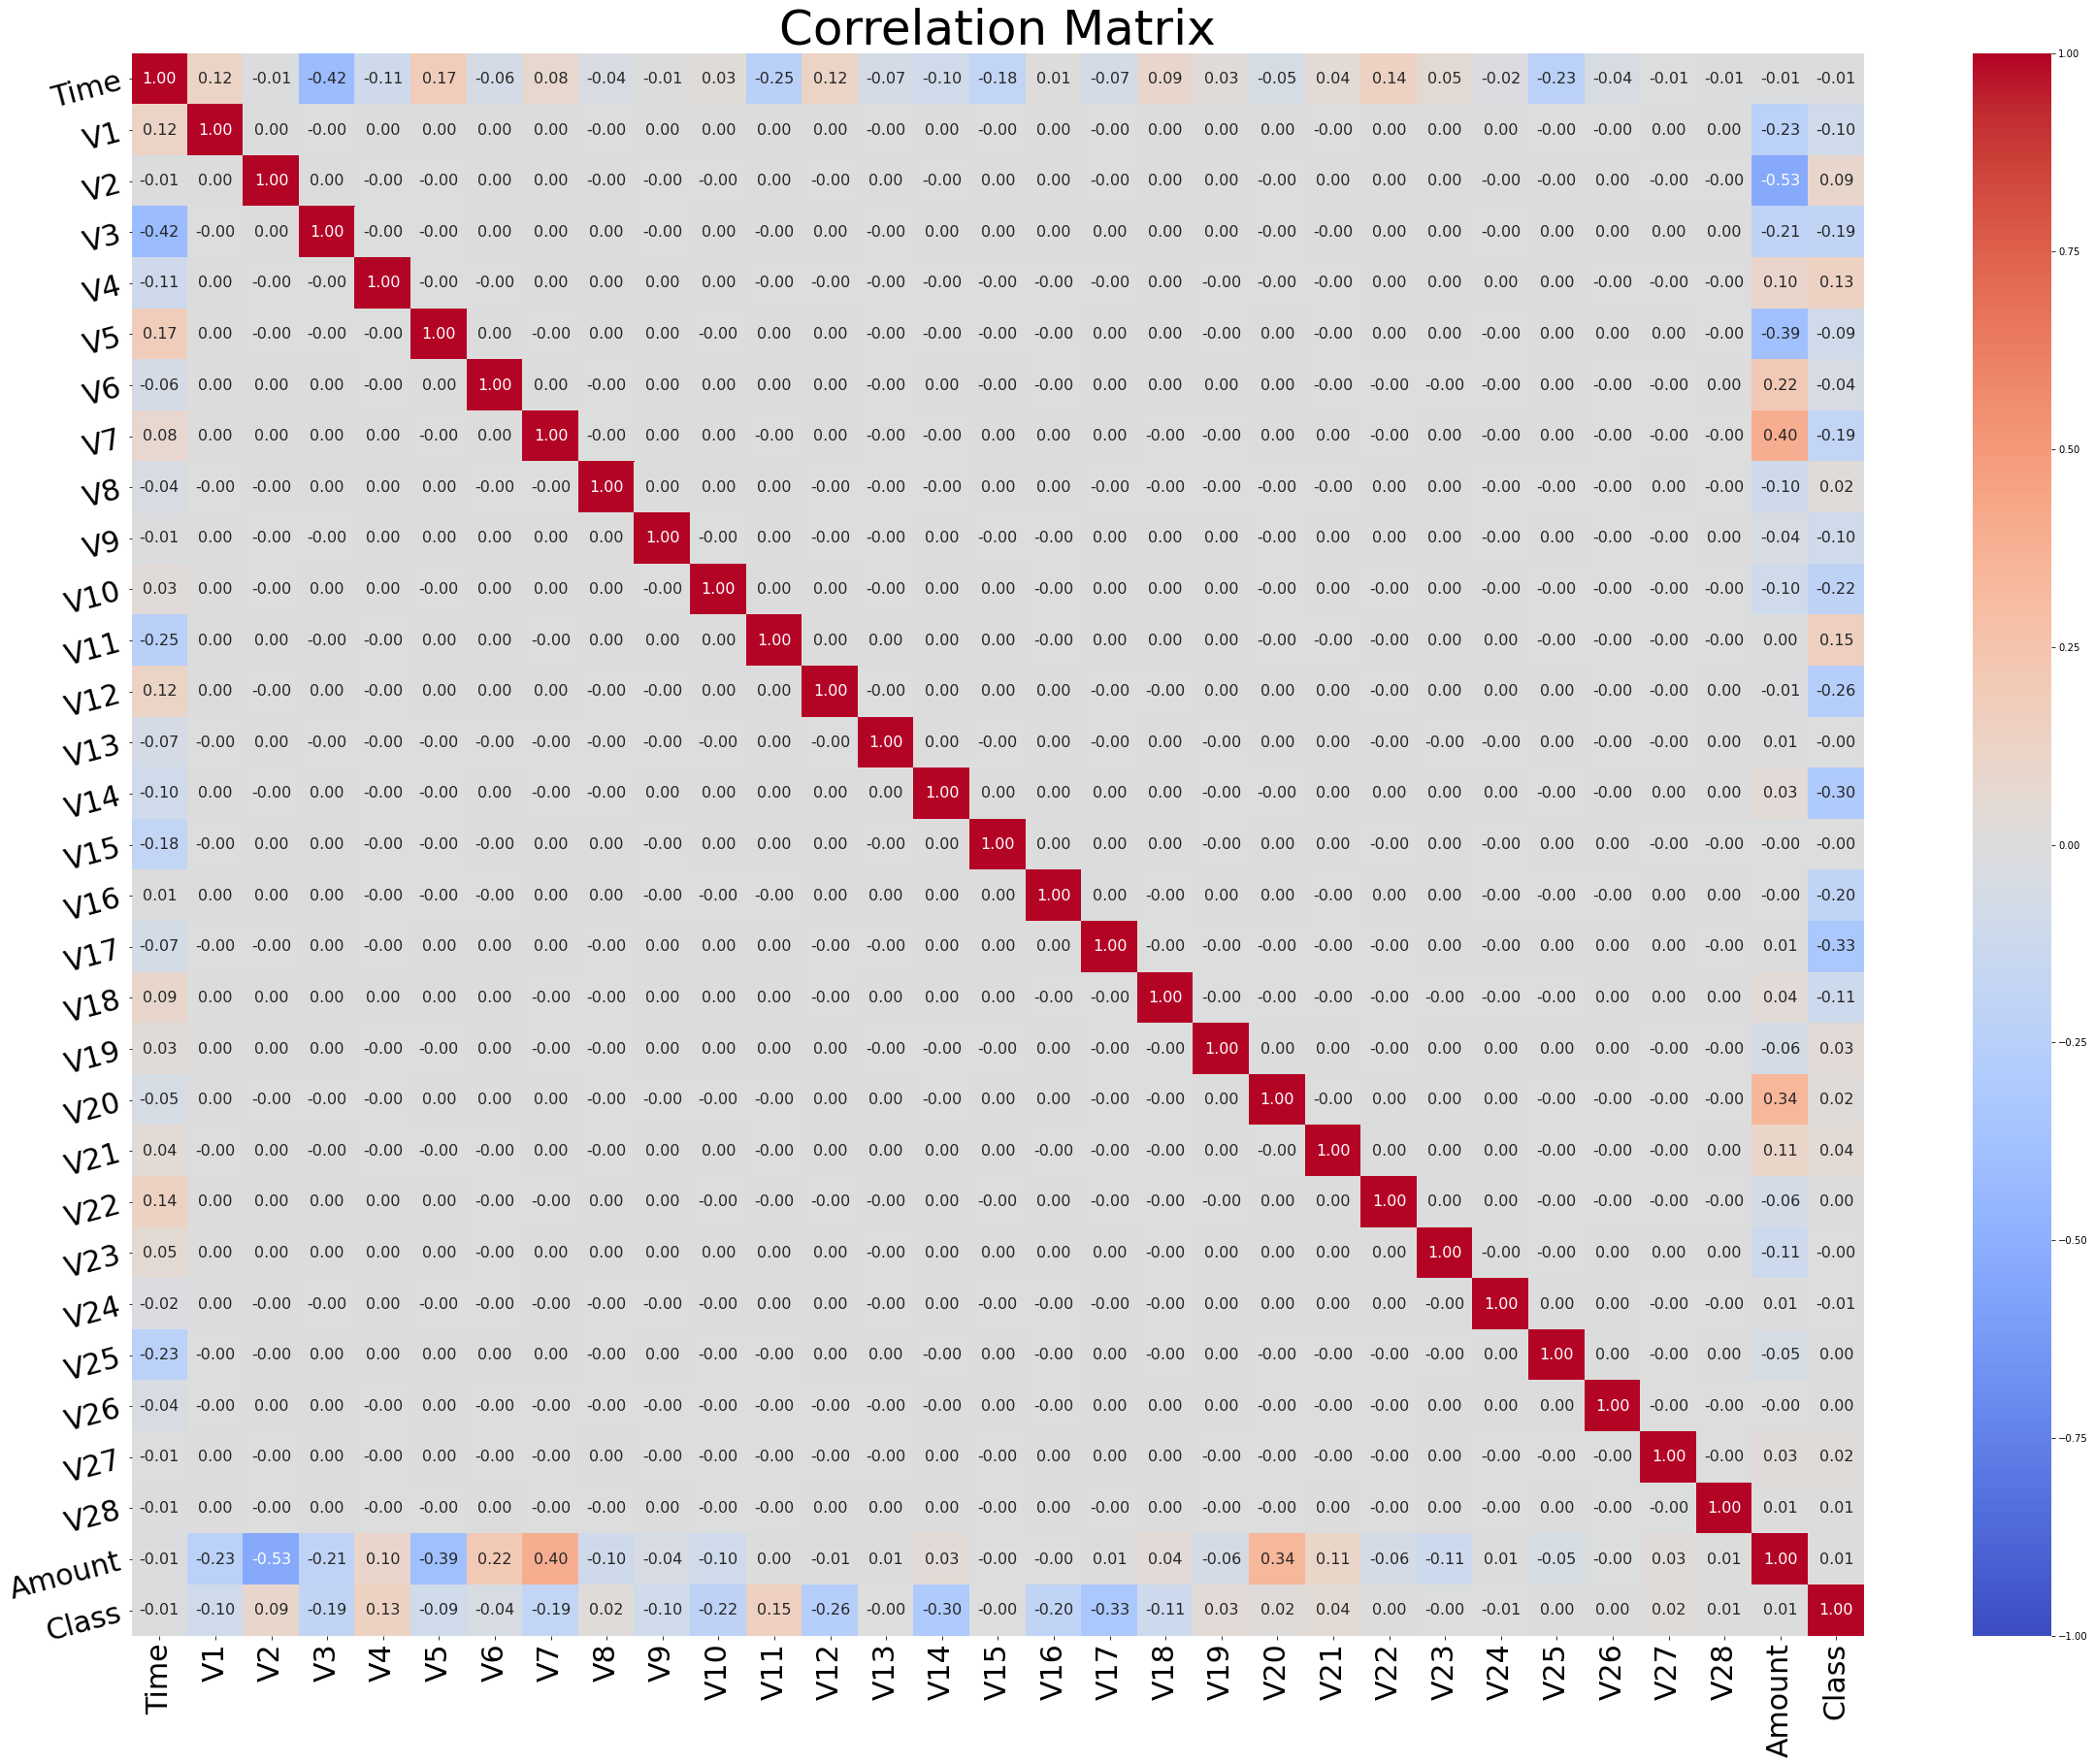

['V13', 'V15', 'V22', 'V23', 'V25', 'V26']

In [7]:
non_contributing(df)

In [8]:
list_cols

['V13', 'V15', 'V22', 'V23', 'V25', 'V26']

In [9]:
df.drop(list_cols,axis=1,inplace=True)

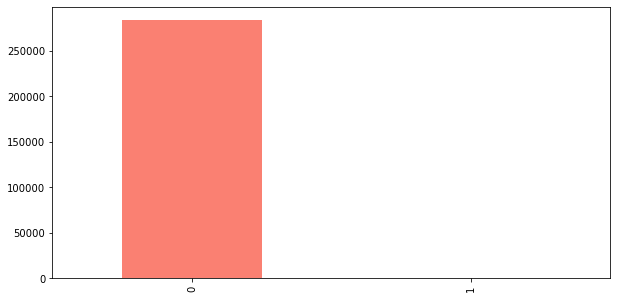

In [10]:
df["Class"].value_counts().plot(kind="bar",color=["salmon","lightblue"],figsize=(10,5));

Data is imbalanced Very Much

In [11]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Treating Skewness

In [12]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [13]:
y


0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [14]:
skewed_cols=[]
def skewness(X):
    for i in range(len(X.columns)):
        skew_value=X[X.columns[i]].skew()
        if (skew_value <-0.5 or skew_value>0.5):
            print(f"The Skewness in {X.columns[i]} is: {skew_value:.2f}")
            skewed_cols.append(X.columns[i])
        else:
            pass
            
        

In [15]:
skewness(X)

The Skewness in V1 is: -3.28
The Skewness in V2 is: -4.62
The Skewness in V3 is: -2.24
The Skewness in V4 is: 0.68
The Skewness in V5 is: -2.43
The Skewness in V6 is: 1.83
The Skewness in V7 is: 2.55
The Skewness in V8 is: -8.52
The Skewness in V9 is: 0.55
The Skewness in V10 is: 1.19
The Skewness in V12 is: -2.28
The Skewness in V14 is: -2.00
The Skewness in V16 is: -1.10
The Skewness in V17 is: -3.84
The Skewness in V20 is: -2.04
The Skewness in V21 is: 3.59
The Skewness in V24 is: -0.55
The Skewness in V27 is: -1.17
The Skewness in V28 is: 11.19
The Skewness in Amount is: 16.98


In [16]:
skewed_cols,len(skewed_cols)

(['V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V12',
  'V14',
  'V16',
  'V17',
  'V20',
  'V21',
  'V24',
  'V27',
  'V28',
  'Amount'],
 20)

In [17]:
#function to check which have negative or Zero Values
neg_skewed=[]
def neg_zero(X):
    """
    pass the Xframe.
    function will return the list of columns with negative numbers that have skewness.
    """
 
    for i in range(len(X.columns)):
        if ((np.min(X[X.columns[i]]) <=0)):
            if ((X[X.columns[i]].skew() < -0.5) or (X[X.columns[i]].skew() >0.5)):
                neg_skewed.append(X.columns[i])          

In [18]:
neg_skewed=[]
neg_zero(X)

In [19]:
neg_skewed,len(neg_skewed)

(['V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V12',
  'V14',
  'V16',
  'V17',
  'V20',
  'V21',
  'V24',
  'V27',
  'V28',
  'Amount'],
 20)

All skewed Columns have negative Values in Them

## Box Cox Transformation

In [20]:
from scipy.stats import boxcox

for i in range( len(skewed_cols)):
    X[skewed_cols[i]],lmbda=boxcox(X[skewed_cols[i]]-np.min(X[skewed_cols[i]])+1)

In [21]:
skewed_cols=[]
skewness(X)

The Skewness in V2 is: 0.84
The Skewness in V5 is: 0.58
The Skewness in V7 is: 2.27
The Skewness in V8 is: 2.53
The Skewness in V10 is: 0.57
The Skewness in V17 is: 0.64
The Skewness in V20 is: 1.81
The Skewness in V21 is: 1.52
The Skewness in V27 is: 2.42
The Skewness in V28 is: 2.06


In [22]:
skewed_cols

['V2', 'V5', 'V7', 'V8', 'V10', 'V17', 'V20', 'V21', 'V27', 'V28']

In [23]:
neg_skewed=[]
neg_zero(X)

In [24]:
neg_skewed

['V2', 'V5', 'V7', 'V8', 'V10', 'V17', 'V20', 'V21', 'V27', 'V28']

In [25]:
from scipy.stats import boxcox

for i in range( len(neg_skewed)):
    X[neg_skewed[i]],lmbda=boxcox(X[neg_skewed[i]]-np.min(X[neg_skewed[i]])+1)

In [26]:
skewed_cols=[]
skewness(X)

The Skewness in V2 is: 0.84
The Skewness in V5 is: 0.58
The Skewness in V7 is: 2.27
The Skewness in V8 is: 2.53
The Skewness in V10 is: 0.59
The Skewness in V17 is: 0.64
The Skewness in V20 is: 1.81
The Skewness in V21 is: 1.59
The Skewness in V27 is: 2.40
The Skewness in V28 is: 2.53


In [27]:
neg_skewed=[]
neg_zero(X)
neg_skewed

['V2', 'V5', 'V7', 'V8', 'V10', 'V17', 'V20', 'V21', 'V27', 'V28']

In [28]:
data_new=pd.concat([X,y],axis=1)
data_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V21,V24,V27,V28,Amount,Class
0,0.0,4.622653e+22,6.478966e+09,1.641676e+14,3.399203,38192.996314,5.376508,40.884331,6.515151e+11,4.130530,...,5561.549084,0.025791,0.403993,577.214388,17.077615,7.060102,81.399564,6.331662,4.490035,0
1,0.0,8.473289e+22,6.649498e+09,1.085649e+14,3.103414,38514.498672,5.327738,40.593547,6.507100e+11,4.035888,...,5361.931891,-0.183361,-0.145783,571.526859,17.000108,5.571935,80.647809,6.340982,1.268075,0
2,1.0,4.624285e+22,5.872853e+09,1.440011e+14,3.080828,38060.383789,5.493395,41.388208,6.603919e+11,3.834074,...,6145.363464,-0.121359,-2.261857,582.087692,17.176921,4.423105,80.403772,6.321571,5.212956,0
3,1.0,5.084518e+22,6.423192e+09,1.444948e+14,2.646483,38457.622839,5.445551,40.882514,6.682074e+11,3.855142,...,5021.546041,1.965775,-1.232622,569.068258,17.044010,3.023805,81.025684,6.353140,4.337344,0
4,2.0,4.854135e+22,6.966562e+09,1.385030e+14,3.088524,38137.568546,5.343777,41.206966,6.299516e+11,4.198160,...,5287.599352,-0.038195,0.803487,580.011402,17.080928,7.349592,81.853554,6.393009,3.879280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,2.728575e+21,1.344699e+10,1.475276e+13,2.172580,34271.022304,5.091893,36.167554,1.217722e+12,4.355900,...,6753.990882,0.510632,-0.682920,599.158586,17.164051,4.999705,85.716949,6.549142,0.563719,0
284803,172787.0,5.378381e+22,6.487782e+09,1.506572e+14,2.692289,39171.666592,5.429071,40.687739,6.632253e+11,4.163636,...,5416.559120,-1.221179,-1.545556,573.807940,17.164331,3.456741,81.056009,6.323195,3.023876,0
284804,172788.0,1.002316e+23,6.366056e+09,5.768477e+13,2.757731,40627.230049,5.597478,40.394406,6.885002e+11,4.140853,...,5627.866092,0.395652,-0.577252,572.775572,17.170978,9.432287,80.718578,6.330227,3.854348,0
284805,172788.0,6.050342e+22,6.785045e+09,1.194135e+14,3.182271,38161.088514,5.390815,40.038715,6.866847e+11,4.134788,...,5752.695738,1.113981,2.897849,575.011473,17.183345,7.278758,81.268928,6.364332,2.273259,0


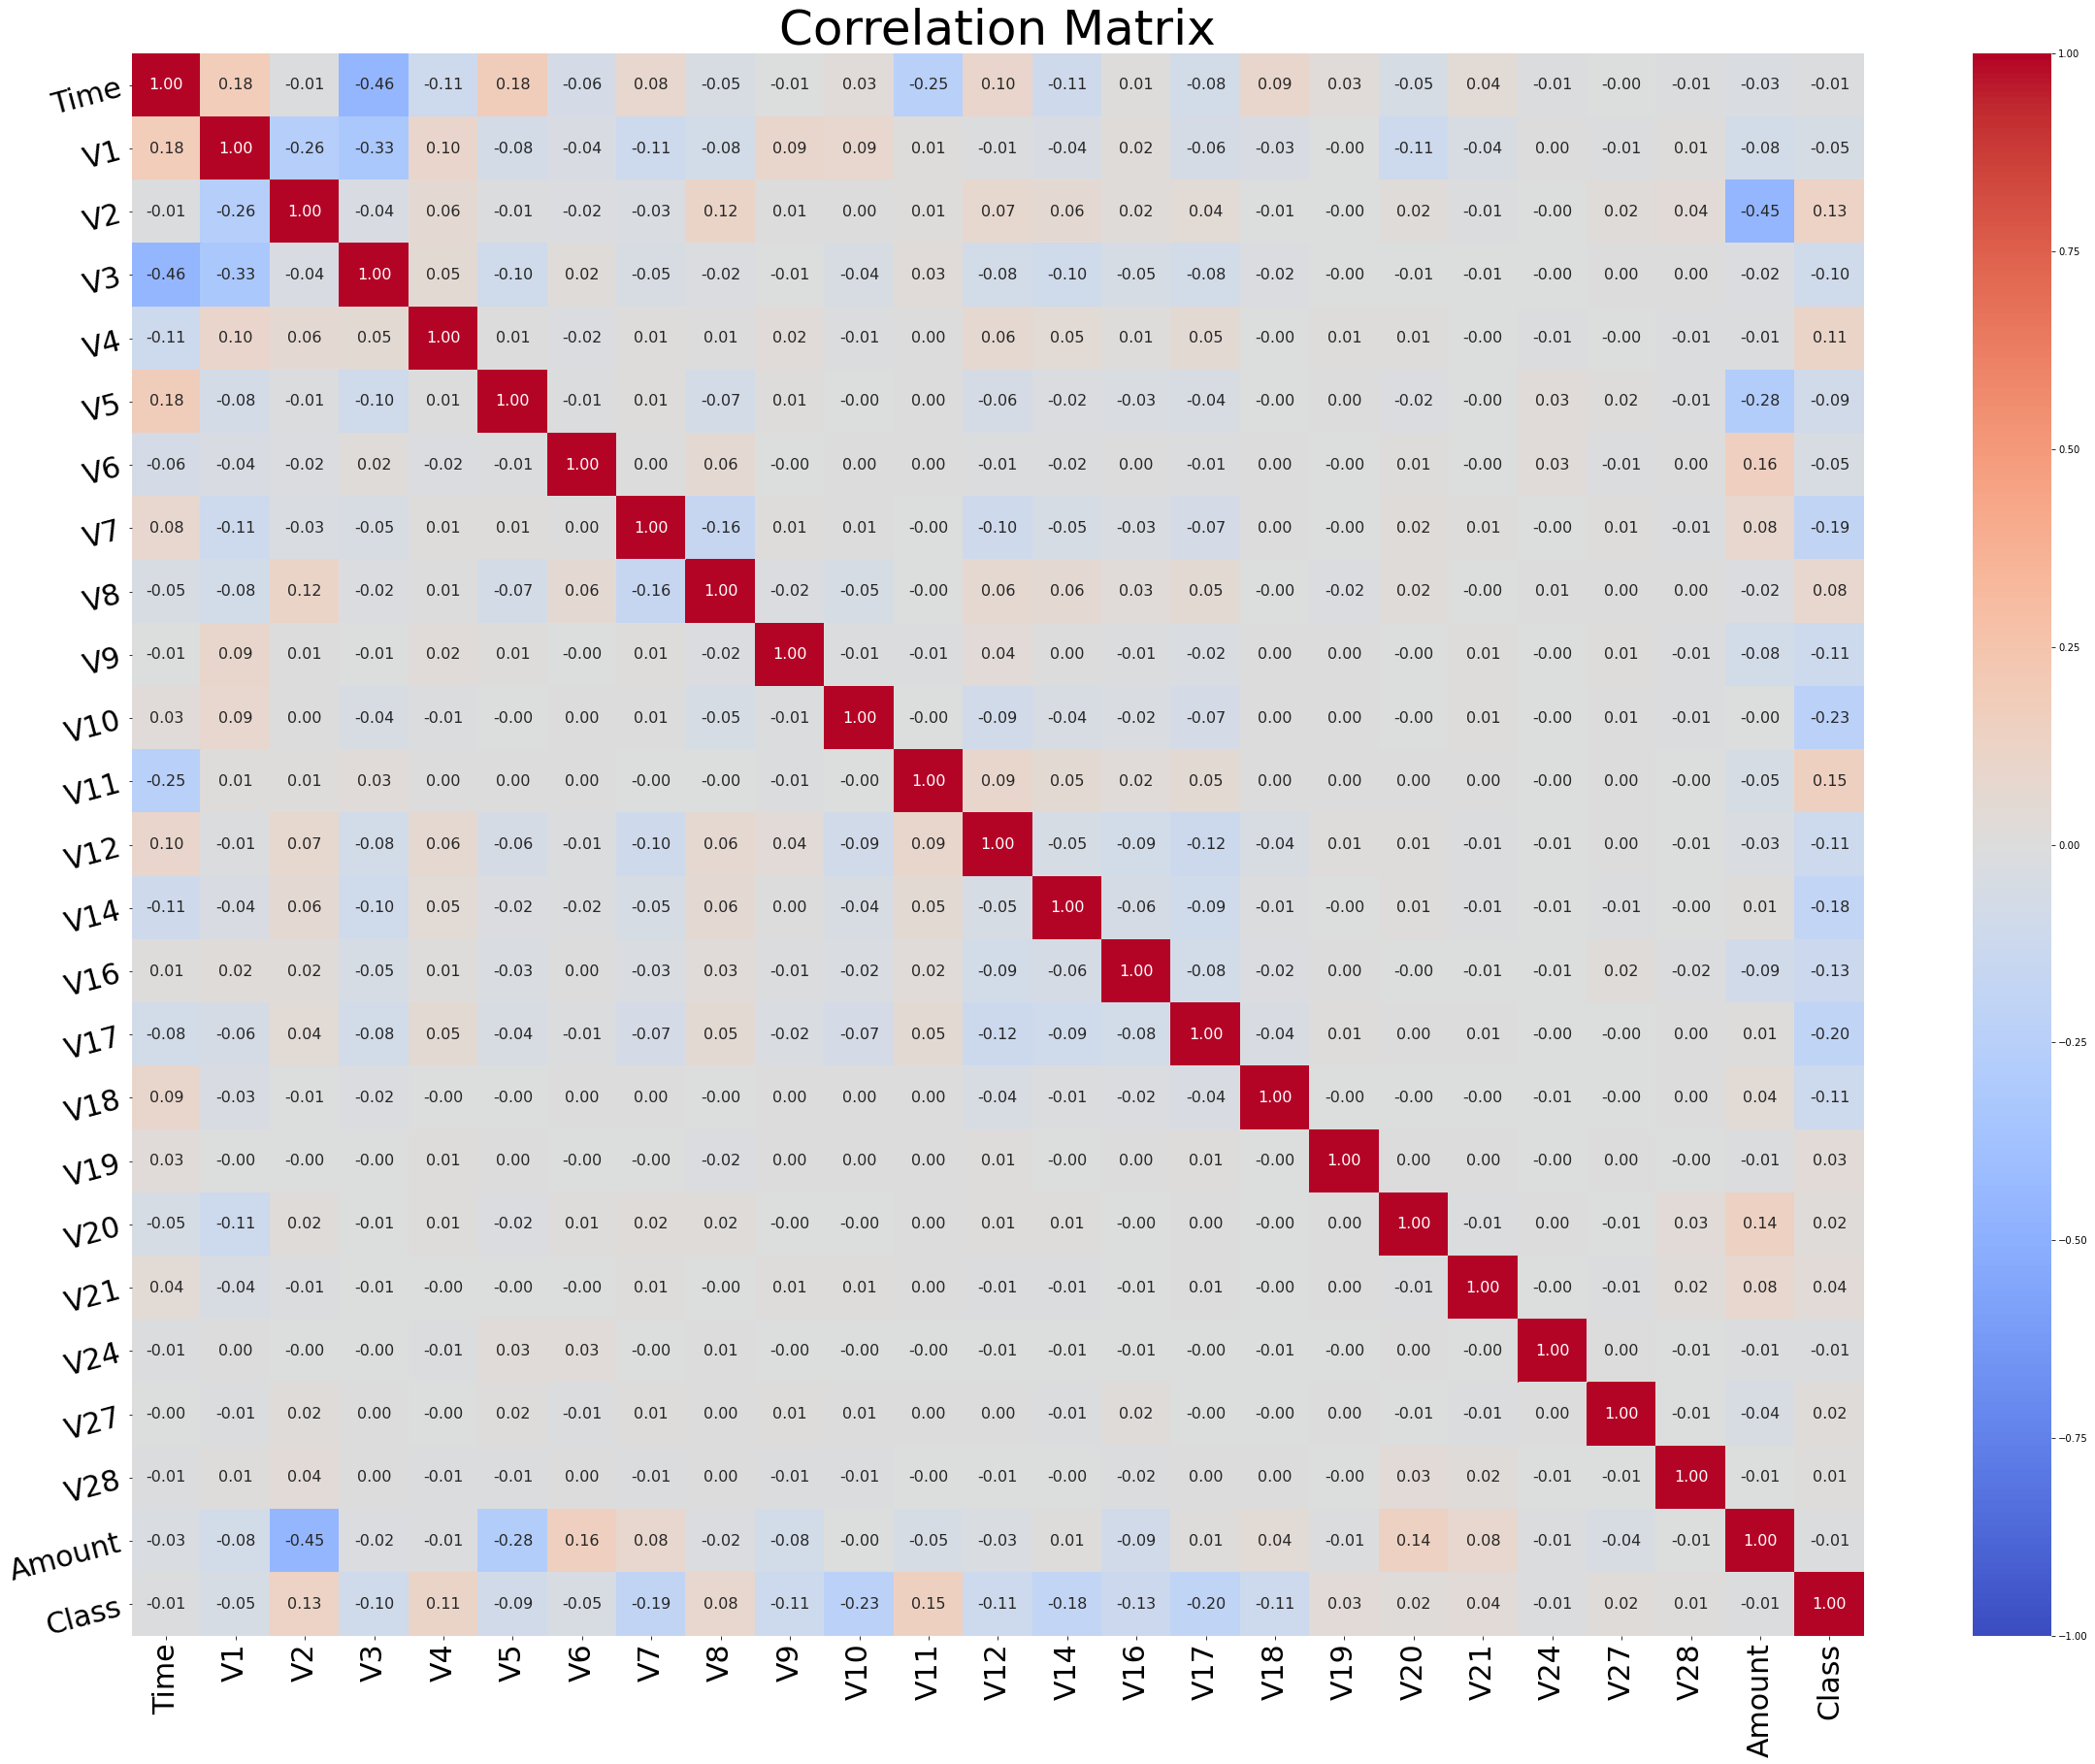

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V21,V24,V27,V28,Amount,Class
Time,1.000000,0.179893,-0.010322,-0.457311,-0.109715,0.175319,-0.064603,0.084712,-0.046786,-0.006105,...,-0.084795,9.043813e-02,2.897530e-02,-0.050823,0.044972,-0.014661,-0.004888,-0.009955,-0.028693,-0.012323
V1,0.179893,1.000000,-0.258112,-0.325973,0.098673,-0.077466,-0.037169,-0.111626,-0.082696,0.092414,...,-0.055087,-3.194111e-02,-4.777269e-03,-0.109615,-0.043825,0.002821,-0.008683,0.011635,-0.082129,-0.053731
V2,-0.010322,-0.258112,1.000000,-0.035158,0.055612,-0.010407,-0.019961,-0.030933,0.116014,0.007293,...,0.043300,-6.326111e-03,-3.837091e-03,0.017392,-0.008816,-0.000741,0.016055,0.036192,-0.453692,0.132382
V3,-0.457311,-0.325973,-0.035158,1.000000,0.047624,-0.096710,0.022693,-0.046383,-0.018649,-0.006960,...,-0.079933,-2.158585e-02,-1.262909e-03,-0.007795,-0.007514,-0.001996,0.001162,0.000771,-0.017362,-0.099257
V4,-0.109715,0.098673,0.055612,0.047624,1.000000,0.006006,-0.016991,0.010220,0.006817,0.024841,...,0.050300,-1.756340e-04,9.797624e-03,0.007862,-0.000829,-0.011687,-0.004490,-0.008385,-0.014949,0.112649
V5,0.175319,-0.077466,-0.010407,-0.096710,0.006006,1.000000,-0.009435,0.014965,-0.070416,0.008413,...,-0.042346,-2.098329e-03,1.267479e-03,-0.021369,-0.003157,0.026022,0.015241,-0.009033,-0.277411,-0.089285
V6,-0.064603,-0.037169,-0.019961,0.022693,-0.016991,-0.009435,1.000000,0.001349,0.061128,-0.001966,...,-0.012964,1.173197e-03,-8.714678e-04,0.011835,-0.001305,0.029292,-0.010119,0.000273,0.158845,-0.045907
V7,0.084712,-0.111626,-0.030933,-0.046383,0.010220,0.014965,0.001349,1.000000,-0.161587,0.011976,...,-0.067609,2.665809e-04,-3.378556e-05,0.019854,0.010151,-0.003212,0.009923,-0.014183,0.084284,-0.188187
V8,-0.046786,-0.082696,0.116014,-0.018649,0.006817,-0.070416,0.061128,-0.161587,1.000000,-0.018559,...,0.047097,-4.566205e-03,-1.661517e-02,0.019232,-0.004205,0.007110,0.000397,0.003166,-0.021900,0.082316
V9,-0.006105,0.092414,0.007293,-0.006960,0.024841,0.008413,-0.001966,0.011976,-0.018559,1.000000,...,-0.024012,2.471333e-03,6.102544e-04,-0.004067,0.011497,-0.000761,0.008281,-0.008583,-0.084443,-0.114428


In [29]:
correlation(data_new)

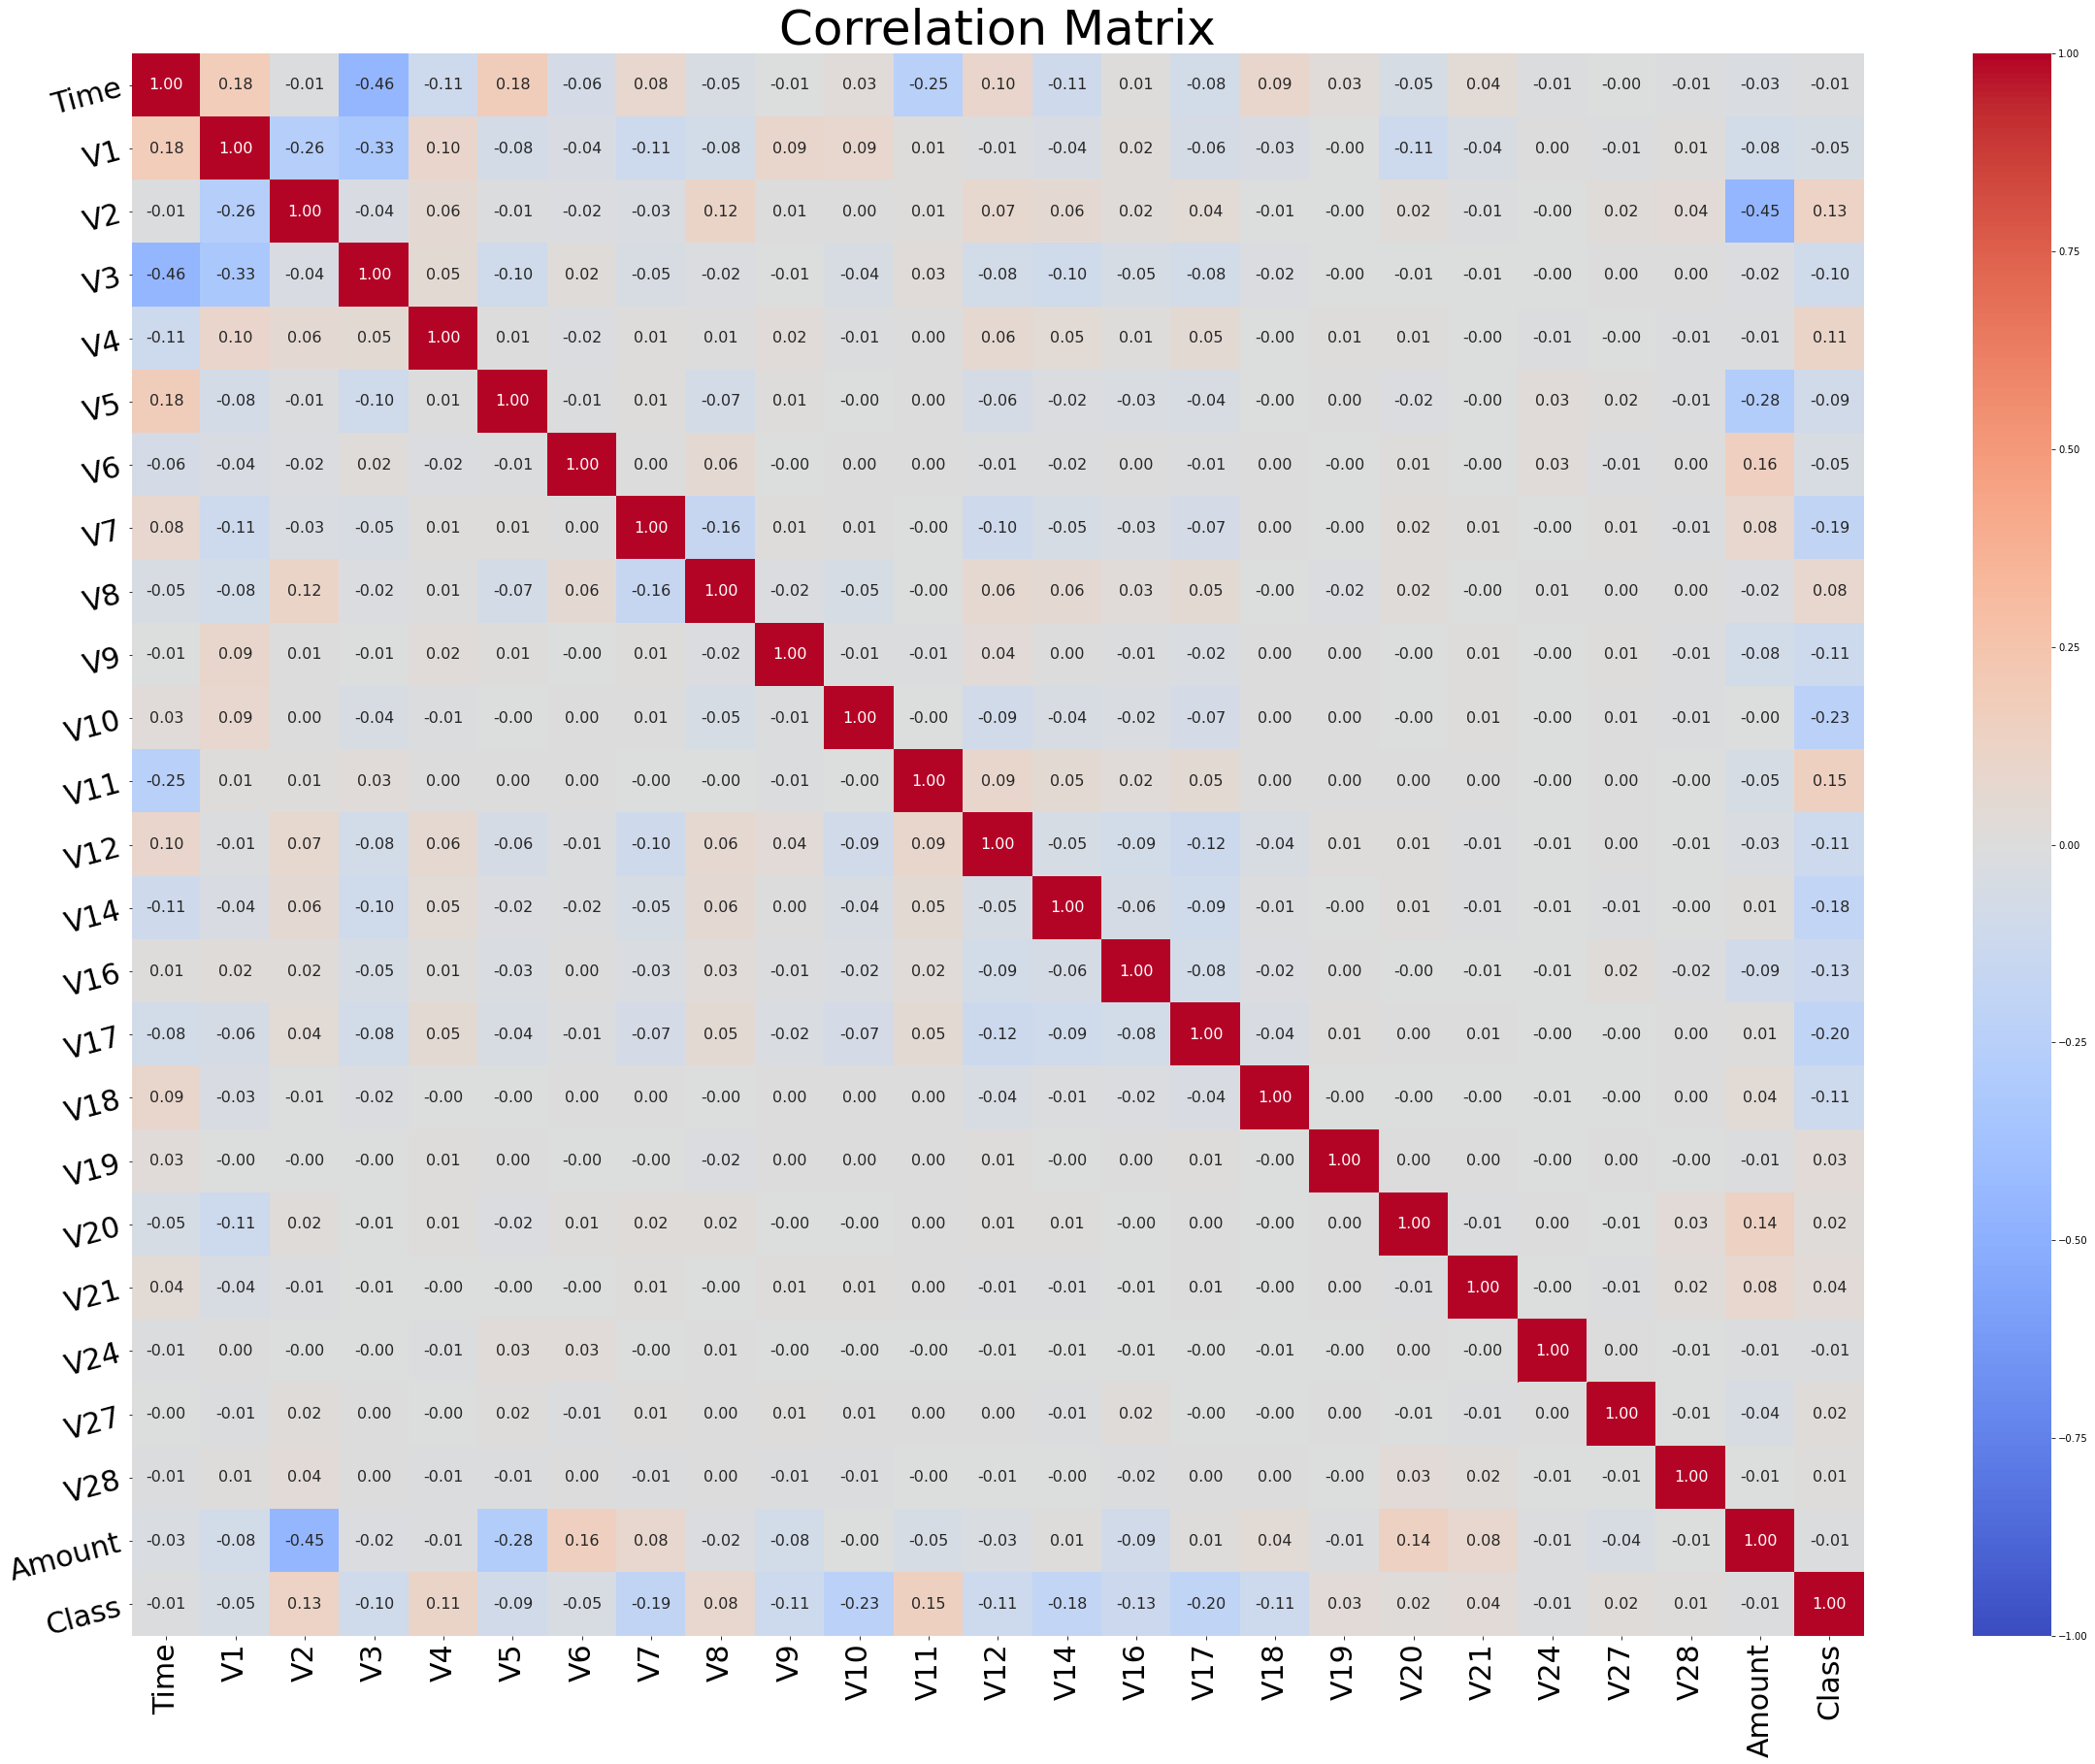

[]

In [30]:
list_cols=[]
non_contributing(data_new)

# Balancing The Data

In [31]:
from imblearn.combine import SMOTEENN
sn=SMOTEENN(random_state=0)
sn.fit(X,y)
X,y=sn.fit_sample(X,y)

# Principal Component Analysis

In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [33]:
transformed_X=pca.transform(X)
transformed_X

array([[ 7.13302244e+21,  5.33331564e+13,  5.66376348e+10, ...,
        -1.15234437e+03, -2.12933900e+02,  9.11726408e+01],
       [ 3.47279147e+22,  6.78912583e+12,  4.64752329e+10, ...,
        -1.22541034e+03,  2.77118428e+02, -1.40274473e+01],
       [ 9.82995180e+20,  3.28999255e+13,  2.80416975e+10, ...,
        -3.19823741e+03, -8.05613429e+02,  4.07465082e+01],
       ...,
       [ 1.82657007e+22, -2.24366215e+13, -3.30294603e+10, ...,
        -3.07677768e+01, -4.46835242e+02, -1.40593966e+01],
       [-4.93588478e+22, -2.46778511e+13, -6.39421686e+10, ...,
         2.54520594e+03, -2.46123986e+02, -5.66328553e+01],
       [-1.81980525e+22,  6.57755582e+13, -4.22528095e+10, ...,
         2.38464540e+02,  5.65177447e+02, -7.84588186e+01]])

In [40]:
len(transformed_X)

295946

# Scaling Our Data

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformed_X,y,
                                              test_size=0.30,
                                              random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

# Training and Testing 

In [43]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score

In [56]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(splitter='random',max_depth=30,
                                      random_state = 62), 
               RandomForestClassifier(n_estimators = 100,
                                      criterion='entropy',
                                      random_state = 92,
                                      class_weight='balanced',
                                      max_depth=30), 
               GradientBoostingClassifier(random_state = 92),
              XGBClassifier(max_depth=30, n_estimators=100,
                           verbosity=0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier",
                    "XGBClassifier"]


In [57]:
avg_pres_score = []
def train_model(x_train,y_train,x_test,y_test):  # Function to train our model and predict on test Data.
    for i in range(len(classifiers)):
        classifier = classifiers[i]
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        print("{}:".format(classifier_names[i]))
        print("F1 score: {:.2f}".format(f1_score(y_test, y_pred,average='weighted')))
        accuracy = average_precision_score(y_test, y_pred)*100
        avg_pres_score.append(accuracy)
    return avg_pres_score

In [64]:
def evaluate_models(avg_pres_score):  
    from matplotlib.cm import rainbow

    plt.figure(figsize = (20, 8))
    colors = rainbow(np.linspace(0, 1, len(classifiers)))
    barplot = plt.bar(classifier_names, avg_pres_score, color = colors)
    plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110], fontsize = 16)
    plt.xticks(fontsize = 18,rotation=60)
    plt.xlabel("Classifiers", fontsize = 24)

    plt.ylabel("Average Precision Score", fontsize = 24)
    plt.title("Plot for Average Precision Score of all classifiers", fontsize = 24)
    for i, bar in enumerate(barplot):
        plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
                 bar.get_height()*1.02, 
                 s = '{:.2f}%'.format(avg_pres_score[i]), 
                 fontsize = 16)

In [59]:
len(x_train),len(x_train[:2000])

(207162, 2000)

In [60]:
train_model(x_train[:2000],y_train[:2000],x_test[:2000],y_test[:2000])

Gaussian Naive Bayes:
F1 score: 0.91
Support Vector Classifier:
F1 score: 0.98
Decision Tree Classifier:
F1 score: 0.96
Random Forest Classifier:
F1 score: 0.98
Gradient Boosting Classifier:
F1 score: 0.98


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier:
F1 score: 0.98


[91.12034776854642,
 97.47160770264219,
 94.41290858792982,
 97.2841596509165,
 97.57237808248664,
 97.67067310500595]

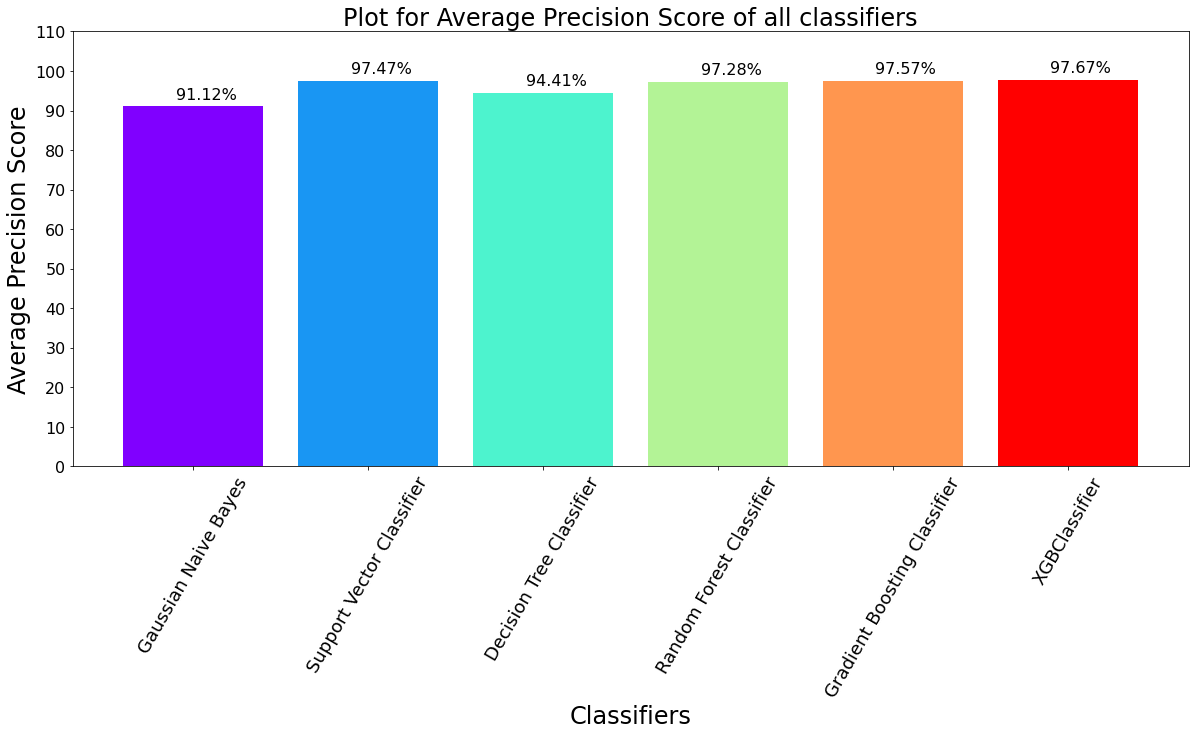

In [65]:
evaluate_models(avg_pres_score)

**Best Model is XGBClassifier with `average precision score : 97.67`**

# Testing on Full Data

In [66]:
avg_pres_score=[]
train_model(x_train,y_train,x_test,y_test)

Gaussian Naive Bayes:
F1 score: 0.92
Support Vector Classifier:
F1 score: 0.99
Decision Tree Classifier:
F1 score: 1.00
Random Forest Classifier:
F1 score: 1.00
Gradient Boosting Classifier:
F1 score: 0.99


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier:
F1 score: 1.00


[92.17384250588154,
 99.1093240112481,
 99.49998295415537,
 99.89888187450602,
 98.9974450442417,
 99.90208427160027]

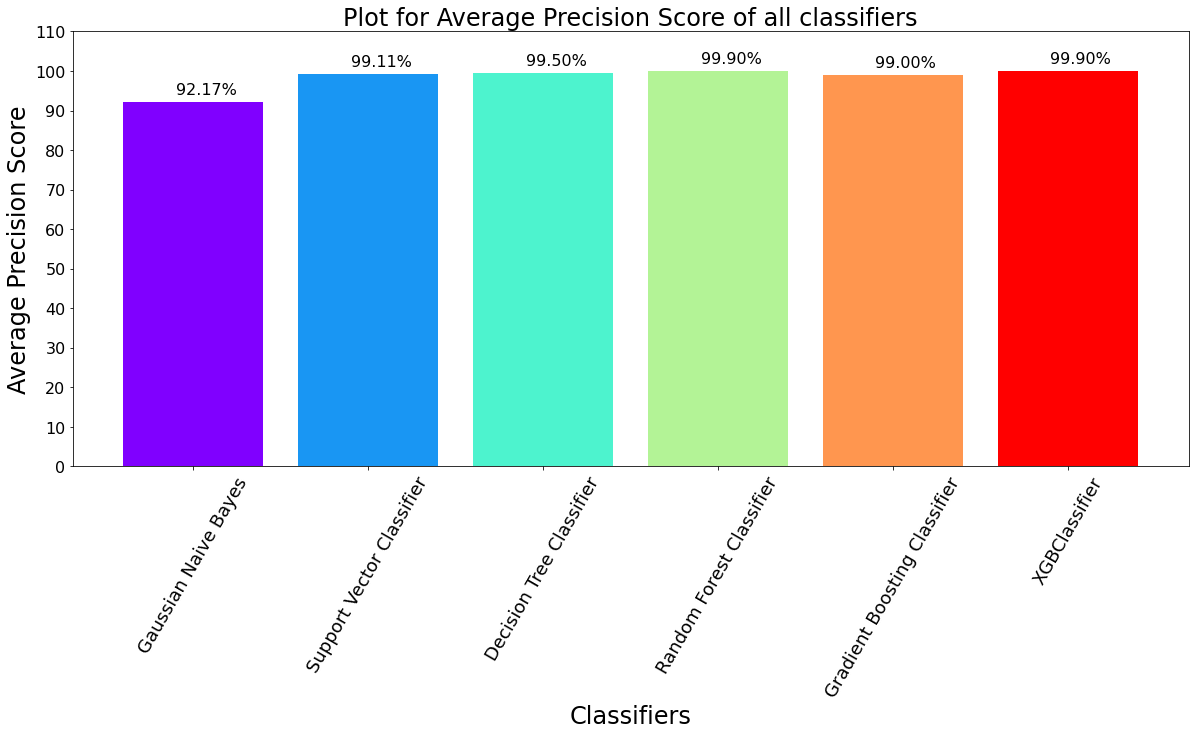

In [68]:
evaluate_models(avg_pres_score)

**Best Models are `RandomForest Classifier` and `XGBClassifier` both with `Average Precision Score : 99.90`**

**`Average Precision Score Got on Test Data == 99.90`**

# Area Under Precission Recall Curve

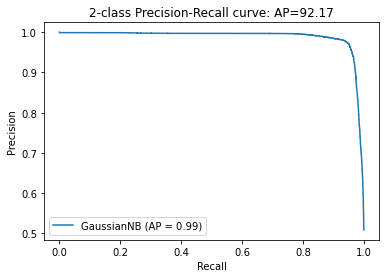

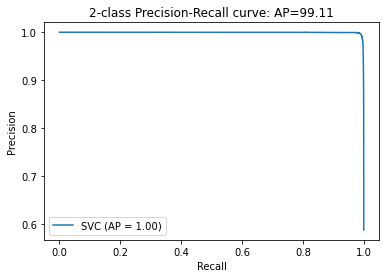

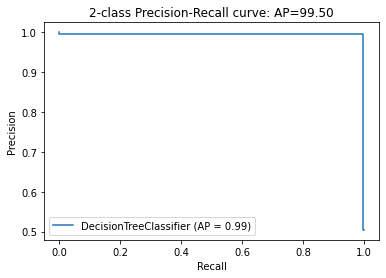

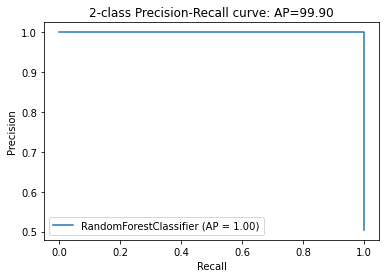

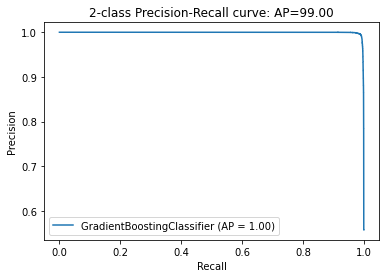

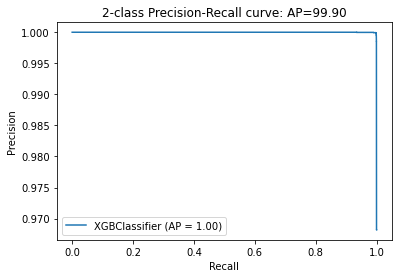

In [73]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
for i in range(len(classifiers)):
    classifier=classifiers[i]
    disp = plot_precision_recall_curve(classifier, x_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                       'AP={0:0.2f}'.format(avg_pres_score[i]))

**`Average Precision Score Got on Test Data == 99.90`**